In [1]:
# Import Dependencies
import pandas as pd

import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# The Data

In [2]:
# Create a reference the CSV file desired
csv_path = "HAR.csv"

# Read the CSV into a Pandas DataFrame
har_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
har_df.head()

,MLS_Number,Street_Number,Street_Name,Unit,City,Price,PSF,Area,Subdivision,Market_Area,Building_SF,Bedrooms,Baths,Stories,DOM
0,45017320,914,Main,1506,Houston,3300,1.12,9,Commerce Tower Condo 02 Amd,Downtown,2934,3,2.1,1.0,18
1,36077525,917,Main,304,Houston,1875,1.18,9,Kirby Lofts Condo,Downtown,1583,2,2.0,1.0,25
2,69357160,1120,Texas,4A,Houston,2650,1.29,9,Keystone Lofts Condo,Downtown,2057,2,2.0,1.0,51
3,10922209,914,Main,709,Houston,3200,1.29,9,Commerce Tower Condo 02 Amd,Downtown,2481,2,2.1,1.0,6
4,91740946,705,Main,807,Houston,2100,1.32,9,St Germain Condos,Downtown,1592,2,2.0,1.0,120


In [3]:
# Count how many rentals are in each Market Area
har_df_counts = har_df["Market_Area"].value_counts()
har_df_counts

Heights            523
Montrose           338
Rice Military      241
EADO               210
University         196
Museum District    190
Midtown            188
River Oaks         117
West University     80
Downtown            55
Sabine              47
Name: Market_Area, dtype: int64

## Inner Loop Communities 

In [4]:
# Create dataframe subset for entire dataset building square footage and price per square foot.
har_df2 = har_df[["Building_SF", "PSF"]]
har_df2

,Building_SF,PSF
0,2934,1.12
1,1583,1.18
2,2057,1.29
3,2481,1.29
4,1592,1.32
...,...,...
2180,4070,2.46
2181,491,2.60
2182,1535,2.61
2183,2406,2.70


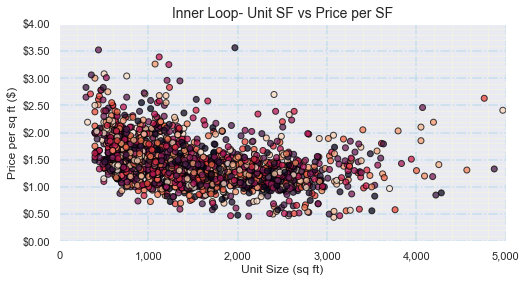

In [5]:
# Inner Loop scatter plot Building SF vs Price per SF
# Import seaborn module
import seaborn as sns
# Set plot defaults using seaborn formatting
sns.set()

# Create arrays
Building_SF = har_df2['Building_SF'].to_numpy()
Price_SF = har_df2['PSF'].to_numpy()
colors = np.random.rand(2185)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(Building_SF, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 5000)

# Major grid lines
plt.grid(b=False, which='major', zorder=0, color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=False, which='minor', zorder=0, color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Inner Loop- Unit SF vs Price per SF',fontsize=14)
plt.xlabel('Unit Size (sq ft)')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Inner Loop Unit SF vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

In [6]:
# Create dataframe subset for entire dataset days on market and price per square foot.
har_DOM = har_df[["DOM", "PSF"]]
har_DOM

,DOM,PSF
0,18,1.12
1,25,1.18
2,51,1.29
3,6,1.29
4,120,1.32
...,...,...
2180,6,2.46
2181,6,2.60
2182,8,2.61
2183,52,2.70


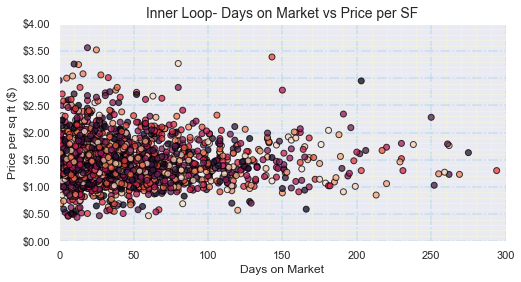

In [7]:
# Inner Loop scatter plot Days on the Market vs Price per SF

# Create arrays
DOM = har_DOM['DOM'].to_numpy()
Price_SF = har_DOM['PSF'].to_numpy()
colors = np.random.rand(2185)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(DOM, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 300)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Inner Loop- Days on Market vs Price per SF',fontsize=14)
plt.xlabel('Days on Market')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Inner Loop DOM vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

## Montrose District

In [8]:
# Filter the data so that only Market Area "Montrose" rentals are in a DataFrame
montrose_df = har_df.loc[har_df["Market_Area"] == "Montrose"]
montrose_df.head()

,MLS_Number,Street_Number,Street_Name,Unit,City,Price,PSF,Area,Subdivision,Market_Area,Building_SF,Bedrooms,Baths,Stories,DOM
976,36656825,2520,Hopkins,C,Houston,1145,1.89,16,Fairview,Montrose,606,2,1.0,1.0,103
977,5502681,1925,Mckinney,NaN,Houston,1200,0.47,16,Temple Terrace,Montrose,2568,2,1.0,2.0,6
978,50069514,423,Marshall,NaN,Houston,950,0.48,16,Westmoreland,Montrose,2000,2,2.0,3.0,6
979,63514197,1837,Kipling,A,Houston,1300,0.50,16,Winlow Place,Montrose,2576,2,1.0,2.0,9
980,54653727,4608,Woodhead,2,Houston,1200,0.51,16,Richwood,Montrose,2358,1,1.0,1.0,43


In [9]:
# Create dataframe subset for Montrose building square footage and price per square foot.
montrose_df2 = montrose_df[["Building_SF", "PSF"]]
montrose_df2

,Building_SF,PSF
976,606,1.89
977,2568,0.47
978,2000,0.48
979,2576,0.50
980,2358,0.51
...,...,...
1309,400,2.50
1310,300,2.65
1311,1121,2.68
1312,350,2.71


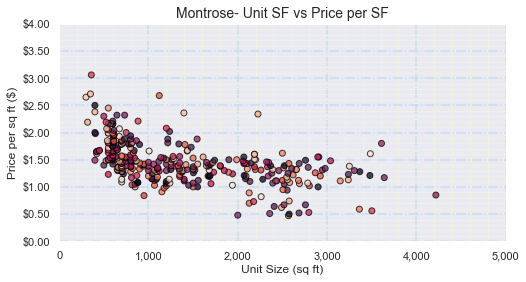

In [10]:
# Montrose scatter plot Building SF vs Price per SF

# Create arrays
Building_SF = montrose_df2['Building_SF'].to_numpy()
Price_SF = montrose_df2['PSF'].to_numpy()
colors = np.random.rand(338)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(Building_SF, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 5000)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Montrose- Unit SF vs Price per SF',fontsize=14)
plt.xlabel('Unit Size (sq ft)')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Montrose Unit SF vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

In [11]:
# Create dataframe subset for Montrose days on market and price per square foot.
montrose_DOM = montrose_df[["DOM", "PSF"]]
montrose_DOM

,DOM,PSF
976,103,1.89
977,6,0.47
978,6,0.48
979,9,0.50
980,43,0.51
...,...,...
1309,5,2.50
1310,41,2.65
1311,31,2.68
1312,2,2.71


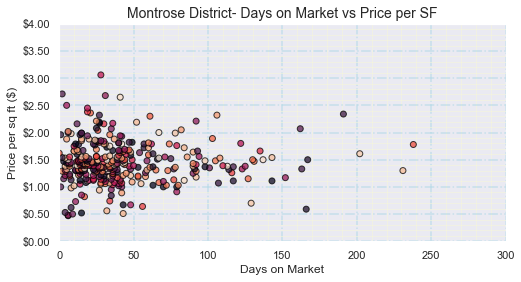

In [12]:
# Montrose District scatter plot Days on the Market vs Price per SF

# Create arrays
DOM = montrose_DOM['DOM'].to_numpy()
Price_SF = montrose_DOM['PSF'].to_numpy()
colors = np.random.rand(338)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(DOM, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 300)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Montrose District- Days on Market vs Price per SF',fontsize=14)
plt.xlabel('Days on Market')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Montrose District DOM vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

## Midtown District

In [13]:
# Filter the data so that only Market Area "Midtown" rentals are in a DataFrame
midtown_df = har_df.loc[har_df["Market_Area"] == "Midtown"]
midtown_df.head()

,MLS_Number,Street_Number,Street_Name,Unit,City,Price,PSF,Area,Subdivision,Market_Area,Building_SF,Bedrooms,Baths,Stories,DOM
788,29856600,303,McGowen,NaN,Houston,2950,0.83,16,Bremond Street T/H Sec 2,Midtown,3534,3,2.1,3.0,84
789,67651813,2807,Jackson,NaN,Houston,1600,0.85,16,Holman Outlot 18,Midtown,1872,2,2.0,3.0,38
790,79732628,1814,Matthews,NaN,Houston,2500,0.89,16,SUTTON-GILLETTE TOWNHOMES SE,Midtown,2799,3,3.1,3.0,11
791,2813167,2416,La Branch,NaN,Houston,2300,0.91,16,Landing At La Branch T H,Midtown,2540,3,3.1,3.0,161
792,92666973,1905,Bailey,NaN,Houston,2000,0.92,16,Sutton-Gillette T/H Sec 01,Midtown,2168,3,3.0,3.0,69


In [14]:
# Create dataframe subset for Midtown building square footage and price per square foot.
midtown_df2 = midtown_df[["Building_SF", "PSF"]]
midtown_df2

,Building_SF,PSF
788,3534,0.83
789,1872,0.85
790,2799,0.89
791,2540,0.91
792,2168,0.92
...,...,...
971,436,2.51
972,468,2.78
973,468,2.78
974,494,2.83


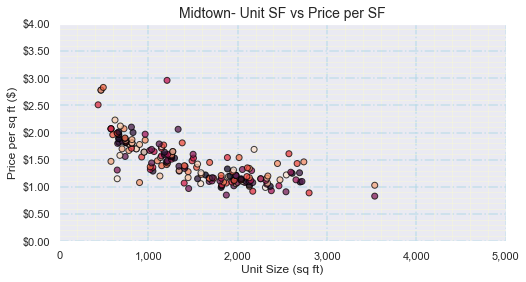

In [15]:
# Midtown scatter plot Building SF vs Price per SF

# Create arrays
Building_SF = midtown_df2['Building_SF'].to_numpy()
Price_SF = midtown_df2['PSF'].to_numpy()
colors = np.random.rand(188)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(Building_SF, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 5000)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Midtown- Unit SF vs Price per SF',fontsize=14)
plt.xlabel('Unit Size (sq ft)')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Midtown Unit SF vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

In [16]:
# Create dataframe subset for Midtown days on market and price per square foot.
midtown_DOM = midtown_df[["DOM", "PSF"]]
midtown_DOM

,DOM,PSF
788,84,0.83
789,38,0.85
790,11,0.89
791,161,0.91
792,69,0.92
...,...,...
971,8,2.51
972,38,2.78
973,150,2.78
974,39,2.83


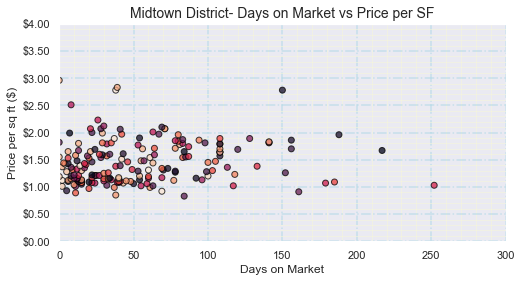

In [17]:
# Midtown District scatter plot Days on the Market vs Price per SF

# Create arrays
DOM = midtown_DOM['DOM'].to_numpy()
Price_SF = midtown_DOM['PSF'].to_numpy()
colors = np.random.rand(188)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(DOM, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 300)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Midtown District- Days on Market vs Price per SF',fontsize=14)
plt.xlabel('Days on Market')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Midtown District DOM vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

## Heights District

In [18]:
# Filter the data so that only Market Area "Heights" rentals are in a DataFrame
heights_df = har_df.loc[har_df["Market_Area"] == "Heights"]
heights_df.head()

,MLS_Number,Street_Number,Street_Name,Unit,City,Price,PSF,Area,Subdivision,Market_Area,Building_SF,Bedrooms,Baths,Stories,DOM
265,66793262,427,17th,3,Houston,950,1.55,9,Houston Heights,Heights,612,1,1.0,2.0,34
266,43148427,427,17th,8,Houston,950,1.55,9,Houston Heights,Heights,612,1,1.0,2.0,29
267,13271752,427,17th,5,Houston,950,1.55,9,Houston Heights,Heights,612,1,1.0,2.0,26
268,25335257,427,17th,1,Houston,950,1.55,9,Houston Heights,Heights,612,1,1.0,2.0,25
269,87748638,6417,Main,NaN,Houston,1200,0.50,9,Sunset Heights,Heights,2394,2,1.0,1.0,9


In [19]:
# Create dataframe subset for Heights building square footage and price per square foot.
heights_df2 = heights_df[["Building_SF", "PSF"]]
heights_df2

,Building_SF,PSF
265,612,1.55
266,612,1.55
267,612,1.55
268,612,1.55
269,2394,0.50
...,...,...
783,1228,3.25
784,1074,3.26
785,1120,3.39
786,440,3.52


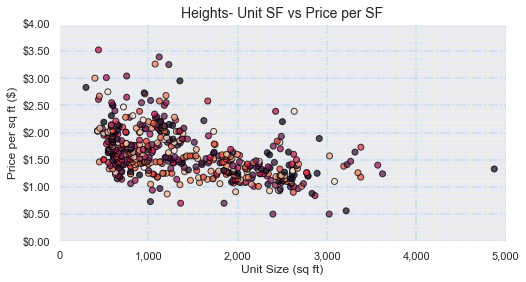

In [20]:
# Heights scatter plot Building SF vs Price per SF

# Create arrays
Building_SF = heights_df2['Building_SF'].to_numpy()
Price_SF = heights_df2['PSF'].to_numpy()
colors = np.random.rand(523)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(Building_SF, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 5000)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Heights- Unit SF vs Price per SF',fontsize=14)
plt.xlabel('Unit Size (sq ft)')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Heights Unit SF vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

In [21]:
# Create dataframe subset for Heights days on market and price per square foot.
heights_DOM = heights_df[["DOM", "PSF"]]
heights_DOM

,DOM,PSF
265,34,1.55
266,29,1.55
267,26,1.55
268,25,1.55
269,9,0.50
...,...,...
783,13,3.25
784,10,3.26
785,143,3.39
786,25,3.52


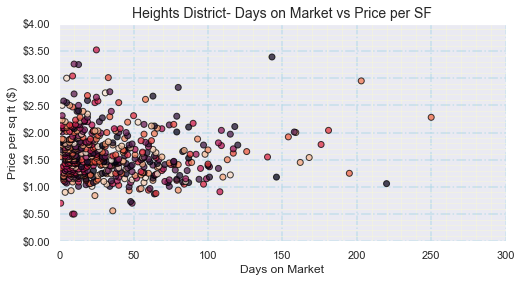

In [22]:
# Heights District scatter plot Days on the Market vs Price per SF

# Create arrays
DOM = heights_DOM['DOM'].to_numpy()
Price_SF = heights_DOM['PSF'].to_numpy()
colors = np.random.rand(523)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(DOM, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 300)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Heights District- Days on Market vs Price per SF',fontsize=14)
plt.xlabel('Days on Market')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Heights District DOM vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

## Museum District

In [23]:
# Filter the data so that only Market Area "Museum District" rentals are in a DataFrame
museum_df = har_df.loc[har_df["Market_Area"] == "Museum District"]
museum_df.head()

,MLS_Number,Street_Number,Street_Name,Unit,City,Price,PSF,Area,Subdivision,Market_Area,Building_SF,Bedrooms,Baths,Stories,DOM
1555,21917889,2431,Shakespeare,6,Houston,850,1.21,17,Wessex Rev,Museum District,700,1,1.0,1.0,53
1556,87282543,1720,Albans,NaN,Houston,1700,0.55,17,Sunset Place,Museum District,3078,2,1.0,2.0,11
1557,48179538,2341,Wroxton,2341,Houston,1850,0.57,17,Southampton Place Ext,Museum District,3260,2,2.0,2.0,120
1558,38592976,2038,Bissonnet,NaN,Houston,2195,0.58,17,Chevy Chase,Museum District,3762,2,1.0,1.0,53
1559,32016425,1740,Banks,NaN,Houston,1750,0.66,17,Ormond Place,Museum District,2660,2,1.0,2.0,39


In [24]:
# Create dataframe subset for Museum District building square footage and price per square foot.
museum_df2 = museum_df[["Building_SF", "PSF"]]
museum_df2

,Building_SF,PSF
1555,700,1.21
1556,3078,0.55
1557,3260,0.57
1558,3762,0.58
1559,2660,0.66
...,...,...
1740,4192,2.19
1741,2604,2.23
1742,561,2.23
1743,500,2.40


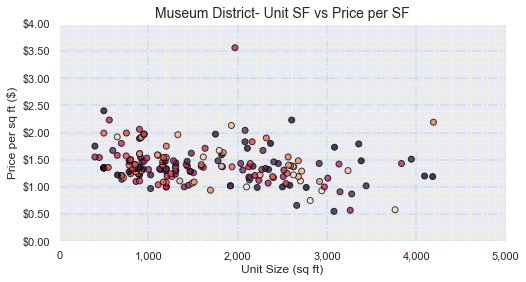

In [25]:
# Museum District scatter plot Building SF vs Price per SF

# Create arrays
Building_SF = museum_df2['Building_SF'].to_numpy()
Price_SF = museum_df2['PSF'].to_numpy()
colors = np.random.rand(190)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(Building_SF, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 5000)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Museum District- Unit SF vs Price per SF',fontsize=14)
plt.xlabel('Unit Size (sq ft)')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Museum District Unit SF vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

In [26]:
# Create dataframe subset for Museum days on market and price per square foot.
museum_DOM = museum_df[["DOM", "PSF"]]
museum_DOM

,DOM,PSF
1555,53,1.21
1556,11,0.55
1557,120,0.57
1558,53,0.58
1559,39,0.66
...,...,...
1740,41,2.19
1741,12,2.23
1742,2,2.23
1743,20,2.40


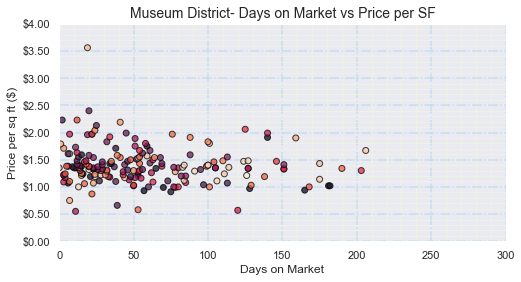

In [27]:
# Museum District scatter plot Days on the Market vs Price per SF

# Create arrays
DOM = museum_DOM['DOM'].to_numpy()
Price_SF = museum_DOM['PSF'].to_numpy()
colors = np.random.rand(190)

fig, ax = plt.subplots(figsize=(8,4))

# The size of each point on our plot is determined by their x value
ax.scatter(DOM, Price_SF, marker="o",c=colors, edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 4)

# The x limits of our scatter plot is 0 to 5000sf
plt.xlim(0, 300)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ticker.FormatStrFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Museum District- Days on Market vs Price per SF',fontsize=14)
plt.xlabel('Days on Market')
plt.ylabel('Price per sq ft ($)')

# Save the figure as .png
plt.savefig('Images/Museum District DOM vs Price per SF.png',bbox_inches="tight")

# Prints the scatter plot to the screen
plt.show()

# Aggregate Statistics

In [28]:
# Using GroupBy in order to separate the data into fields according to "Market_Area" values
har_df1 = har_df.drop(['MLS_Number'], axis = 1)
har_df1.head()

,Street_Number,Street_Name,Unit,City,Price,PSF,Area,Subdivision,Market_Area,Building_SF,Bedrooms,Baths,Stories,DOM
0,914,Main,1506,Houston,3300,1.12,9,Commerce Tower Condo 02 Amd,Downtown,2934,3,2.1,1.0,18
1,917,Main,304,Houston,1875,1.18,9,Kirby Lofts Condo,Downtown,1583,2,2.0,1.0,25
2,1120,Texas,4A,Houston,2650,1.29,9,Keystone Lofts Condo,Downtown,2057,2,2.0,1.0,51
3,914,Main,709,Houston,3200,1.29,9,Commerce Tower Condo 02 Amd,Downtown,2481,2,2.1,1.0,6
4,705,Main,807,Houston,2100,1.32,9,St Germain Condos,Downtown,1592,2,2.0,1.0,120


In [29]:
# Find the median values for rental home characteristics in each Market Area.
grouped_df = har_df1.groupby(['Market_Area'], as_index=False).median()
grouped_df


,Market_Area,Price,PSF,Area,Building_SF,Bedrooms,Baths,Stories,DOM
0,Downtown,1850.0,1.670,9.0,1066.0,1.0,1.00,1.0,40.0
1,EADO,1750.0,1.220,4.0,1454.0,2.0,2.00,2.0,32.0
2,Heights,2000.0,1.540,9.0,1178.0,2.0,1.10,1.0,25.0
3,Midtown,1950.0,1.385,16.0,1403.0,2.0,2.00,2.0,40.5
4,Montrose,1485.0,1.420,16.0,1118.0,2.0,1.00,2.0,34.0
5,Museum District,1875.0,1.350,17.0,1457.0,2.0,2.00,2.0,50.0
6,Rice Military,2650.0,1.270,16.0,2191.0,3.0,3.10,3.0,30.0
7,River Oaks,1800.0,1.530,16.0,1252.0,2.0,1.10,2.0,36.0
8,Sabine,2750.0,1.410,9.0,2074.0,3.0,3.10,3.0,20.0
9,University,1425.0,1.085,4.0,1433.5,3.0,2.00,1.0,23.5


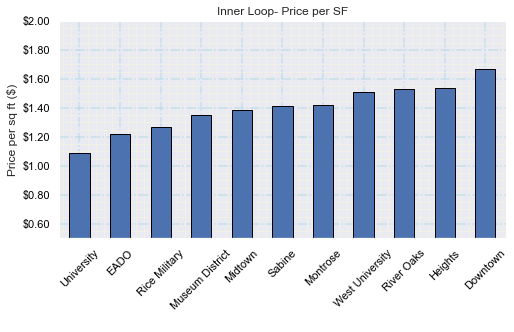

In [30]:
# Bar chart with the biggest gainers and losers for sales volume
# Bar chart selection 
import matplotlib.patches as mpatches

Market_Area = grouped_df['Market_Area'].to_numpy()
Price_SF = grouped_df['PSF'].to_numpy()

fig, ax = plt.subplots(1, 1,figsize=(8,4))

# Sort values ascending
top = grouped_df.sort_values(by='PSF', ascending=True)

top.plot(kind='bar',x='Market_Area',y='PSF',edgecolor='black', legend = False, align="center", figsize=(8,4), rot=45, title="Inner Loop- Price per SF",ax=ax)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Price per sq ft ($)", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')
#plt.yticks([])

# labels and Title
y_formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(y_formatter)

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=.75)

# Sets the y limits
plt.ylim(0.50, 2)

# Save the figure as .png
plt.savefig('Images/Inner Loop PSF.png',bbox_inches="tight")

plt.show(block=True)

In [31]:
# Find the median values for rental home characteristics in each Market Area.
grouped_df2 = har_df1.groupby(['Market_Area'], as_index=True).median()
grouped_df2.loc['Median'] = grouped_df2.median()

grouped_df2.head(12).style.format({"Price": "${:20,.0f}","PSF": "${:20,.2f}","Area": "{:20,.0f}",
                                  "Building_SF": "{:20,.1f}","Bedrooms": "{:20,.0f}",
                                 "Baths": "{:20,.0f}","Stories": "{:20,.0f}","DOM": "{:20,.0f}"})

,Price,PSF,Area,Building_SF,Bedrooms,Baths,Stories,DOM
Market_Area,,,,,,,,
Downtown,"$ 1,850",$ 1.67,9,"1,066.0",1,1,1,40
EADO,"$ 1,750",$ 1.22,4,"1,454.0",2,2,2,32
Heights,"$ 2,000",$ 1.54,9,"1,178.0",2,1,1,25
Midtown,"$ 1,950",$ 1.38,16,"1,403.0",2,2,2,40
Montrose,"$ 1,485",$ 1.42,16,"1,118.0",2,1,2,34
Museum District,"$ 1,875",$ 1.35,17,"1,457.0",2,2,2,50
Rice Military,"$ 2,650",$ 1.27,16,"2,191.0",3,3,3,30
River Oaks,"$ 1,800",$ 1.53,16,"1,252.0",2,1,2,36
Sabine,"$ 2,750",$ 1.41,9,"2,074.0",3,3,3,20


In [32]:
# Find the median values for rental home characteristics in each Market Area and index Market_Area
grouped_df3 = har_df1.groupby(['Market_Area'], as_index=True).median()
grouped_df3

,Price,PSF,Area,Building_SF,Bedrooms,Baths,Stories,DOM
Market_Area,,,,,,,,
Downtown,1850.0,1.670,9.0,1066.0,1.0,1.00,1.0,40.0
EADO,1750.0,1.220,4.0,1454.0,2.0,2.00,2.0,32.0
Heights,2000.0,1.540,9.0,1178.0,2.0,1.10,1.0,25.0
Midtown,1950.0,1.385,16.0,1403.0,2.0,2.00,2.0,40.5
Montrose,1485.0,1.420,16.0,1118.0,2.0,1.00,2.0,34.0
Museum District,1875.0,1.350,17.0,1457.0,2.0,2.00,2.0,50.0
Rice Military,2650.0,1.270,16.0,2191.0,3.0,3.10,3.0,30.0
River Oaks,1800.0,1.530,16.0,1252.0,2.0,1.10,2.0,36.0
Sabine,2750.0,1.410,9.0,2074.0,3.0,3.10,3.0,20.0


In [33]:
# Find the median values for rental home characteristics in each Market Area and index Market_Area
grouped_df3 = har_df1.groupby(['Market_Area'], as_index=True).median()
grouped_df3.loc['Median'] = grouped_df3.median()

grouped_df3.head(12).style.format({"Price": "${:20,.0f}","PSF": "${:20,.2f}","Area": "{:20,.0f}",
                                  "Building_SF": "{:20,.0f}","Bedrooms": "{:20,.0f}",
                                 "Baths": "{:20,.0f}","Stories": "{:20,.0f}","DOM": "{:20,.0f}"})

,Price,PSF,Area,Building_SF,Bedrooms,Baths,Stories,DOM
Market_Area,,,,,,,,
Downtown,"$ 1,850",$ 1.67,9,"1,066",1,1,1,40
EADO,"$ 1,750",$ 1.22,4,"1,454",2,2,2,32
Heights,"$ 2,000",$ 1.54,9,"1,178",2,1,1,25
Midtown,"$ 1,950",$ 1.38,16,"1,403",2,2,2,40
Montrose,"$ 1,485",$ 1.42,16,"1,118",2,1,2,34
Museum District,"$ 1,875",$ 1.35,17,"1,457",2,2,2,50
Rice Military,"$ 2,650",$ 1.27,16,"2,191",3,3,3,30
River Oaks,"$ 1,800",$ 1.53,16,"1,252",2,1,2,36
Sabine,"$ 2,750",$ 1.41,9,"2,074",3,3,3,20


In [34]:
# Find the median values for rental home characteristics by number of bedrooms in the Inner Loop.
beds_df = har_df1.groupby(['Bedrooms'], as_index=False).median()
beds_df = beds_df.drop(['Area'], axis = 1)
beds_df.style.format({"Price": "${:20,.0f}","PSF": "${:20,.2f}"})
#                                 "Building_SF": "{:20,.0f}","Bedrooms": "{:20,.0f}",
#                                 "Baths": "{:20,.0f}","Stories": "{:20,.0f}","DOM": "{:20,.0f}"})
beds_df

,Bedrooms,Price,PSF,Building_SF,Baths,Stories,DOM
0,1,1150.0,1.640,700.0,1.0,1.0,35.0
1,2,1800.0,1.400,1244.0,2.0,1.0,32.0
2,3,2700.0,1.240,2152.0,3.0,3.0,30.0
3,4,3700.0,1.305,2849.5,3.1,2.0,29.0


In [35]:
# Find the median values for rental home characteristics by number of bedrooms in the Inner Loop.
# Set bedrooms as the index
beds_df3 = har_df1.groupby(['Bedrooms'], as_index=True).median()
beds_df3 = beds_df3.drop(['Area'], axis = 1)
beds_df3.loc['Median'] = beds_df3.median()

beds_df3.head(5).style.format({"Price": "${:20,.0f}","PSF": "${:20,.2f}",
                                  "Building_SF": "{:20,.1f}","Bedrooms": "{:20,.0f}",
                                 "Baths": "{:20,.0f}","Stories": "{:20,.0f}","DOM": "{:20,.0f}"})

,Price,PSF,Building_SF,Baths,Stories,DOM
Bedrooms,,,,,,
1,"$ 1,150",$ 1.64,700.0,1,1,35
2,"$ 1,800",$ 1.40,"1,244.0",2,1,32
3,"$ 2,700",$ 1.24,"2,152.0",3,3,30
4,"$ 3,700",$ 1.31,"2,849.5",3,2,29
Median,"$ 2,250",$ 1.35,"1,698.0",2,2,31
